### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:
strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [202]:
import numpy as np
from scipy.optimize import differential_evolution

In [203]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, maxiter = 100)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [239]:
# strategy: 'best1bin', 'best1exp', 'rand1exp', 'best2bin' etc

result = differential_evolution(ackley, bounds, seed=42, maxiter = 100, strategy = 'best1bin')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [254]:
result = differential_evolution(ackley, bounds, seed=42, maxiter = 100, strategy = 'best1bin', popsize = 1)
result
# nit ниже всего при popsize 1 и 2, а дальше начинает увеличиваться 

     fun: 2.5799275570299085
     jac: array([-1.42108547e-06, -1.06581410e-06])
 message: 'Optimization terminated successfully.'
    nfev: 103
     nit: 7
 success: True
       x: array([-2.86743508e-08,  9.52166523e-01])

In [262]:
result = differential_evolution(ackley, bounds, seed=42, maxiter = 100, popsize = 1, tol = 0.1)
result

     fun: 1.4482961052664223e-08
     jac: array([ 1.78217014, -0.06563532])
 message: 'Optimization terminated successfully.'
    nfev: 198
     nit: 5
 success: True
       x: array([ 2.11467798e-10, -5.11613193e-09])

In [264]:
result = differential_evolution(ackley, bounds, seed=42, maxiter = 100, popsize = 1, tol = 0.1, mutation = 1)
result

     fun: 3.5744518772578115
     jac: array([ 1.42108547e-06, -3.19744231e-06])
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 9
 success: True
       x: array([-0.96847764,  0.96847759])

In [266]:
result = differential_evolution(ackley, bounds, seed=42, maxiter = 100, popsize = 1, tol = 0.1, 
                                mutation = 1, recombination =0.4)
result

     fun: 3.5744518772578115
     jac: array([ 1.42108547e-06, -3.19744231e-06])
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 9
 success: True
       x: array([-0.96847764,  0.96847759])

In [267]:
result = differential_evolution(ackley, bounds, seed=42, maxiter = 100, popsize = 1, tol = 0.1, 
                                mutation = 1, recombination =0.8, updating = 'immediate' )
result

     fun: 2.579927557029873
     jac: array([3.55271368e-07, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 75
     nit: 8
 success: True
       x: array([-3.61492834e-09,  9.52166540e-01])

In [257]:
results = []
N = 100
for i in range(1,N):
    m = differential_evolution(lambda x: ackley(x), bounds=bounds, seed = 42, maxiter = i).x
    print(i,m)
    results.append((m))
results = np.array(results)

1 [2.35521932e-08 9.52166524e-01]
2 [ 0.11246781 -0.58573783]
3 [ 2.26066960e-09 -1.85826376e-09]
4 [-2.62560563e-09 -4.31745709e-09]
5 [-0.10762443  0.05681589]
6 [-0.10762443  0.05681589]
7 [ 0.10756774 -0.03752302]
8 [-0.07084284 -0.03829208]
9 [-0.04442853 -0.03752302]
10 [-4.68011705e-09 -3.37908951e-10]
11 [-1.72368040e-09  2.28719454e-09]
12 [-1.72368040e-09  2.28719454e-09]
13 [-5.00612550e-09 -5.02412591e-09]
14 [ 0.00401279 -0.00139683]
15 [-7.82500589e-10  6.32835643e-10]
16 [-0.00087586 -0.00049431]
17 [-0.00087586 -0.00049431]
18 [0.00072909 0.00012037]
19 [-0.00063319 -0.00025297]
20 [-0.00063319 -0.00025297]
21 [-4.66887325e-09 -3.45729337e-09]
22 [-5.01354519e-09 -5.36930856e-09]
23 [-1.35368341e-05 -1.58547602e-04]
24 [-1.35368341e-05 -1.58547602e-04]
25 [-4.84079338e-09 -4.64404038e-09]
26 [-4.84079338e-09 -4.64404038e-09]
27 [-1.95446926e-10 -5.00907555e-09]
28 [ 9.81658199e-06 -2.18867409e-06]
29 [-4.78680365e-09 -4.96703366e-09]
30 [7.97019209e-06 4.64563825e-07]
3

In [253]:
for r in results:
    x = list(zip(*results))[0]
    y = list(zip(*results))[1]

In [251]:
type(x)

tuple

In [228]:
indices = []
for i in range(len(results)):
    indices.append(i)
indices = tuple(indices)

In [229]:
type(indices)

tuple

In [233]:
z = indices

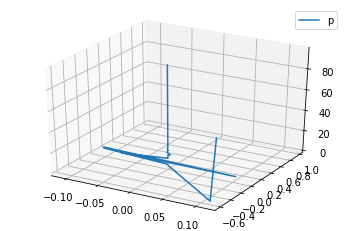

In [235]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x, y, z, label='p')
ax.legend()
plt.show()

In [ ]:
# по допзаданию - можно ли использовать gridsearch? если нет, то как сделать перебор?